In [68]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

from astropy.table import Table,join,hstack,vstack
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import corner
import time
import pickle
import imageio as iio

In [69]:
dates = glob.glob('daily/*.fits')
dates = [date[-11:-5] for date in dates]
dates.sort()

print(dates)

['131216', '131217', '131220', '140111', '140112', '140113', '140114', '140115', '140116', '140117', '140118', '140207', '140208', '140209', '140210', '140211', '140212', '140303', '140304', '140305', '140307', '140308', '140309', '140310', '140312', '140313', '140314', '140315', '140316', '140409', '140412', '140413', '140414', '140607', '140608', '140609', '140610', '140611', '140707', '140708', '140709', '140710', '140711', '140713', '140805', '140806', '140807', '140808', '140809', '140810', '140811', '140812', '140813', '140814', '140822', '140823', '140824', '141031', '141102', '141103', '141104', '141202', '141231', '150101', '150102', '150103', '150105', '150106', '150107', '150108', '150109', '150112', '150204', '150205', '150206', '150207', '150208', '150209', '150210', '150211', '150330', '150401', '150405', '150406', '150407', '150408', '150409', '150410', '150411', '150412', '150413', '150426', '150427', '150428', '150429', '150430', '150504', '150531', '150601', '150602',

In [70]:
def combine_dates(dates):
    
    data = Table.read('daily/galah_dr4_allspec_not_validated_'+str(dates[0])+'.fits')
    
    for date in dates[1:]:
        data_next = Table.read('daily/galah_dr4_allspec_not_validated_'+str(date)+'.fits')
        data = vstack([data, data_next])
    data['tmass_id'] = np.array(data['tmass_id'],dtype=str)

    return(data)

data = combine_dates(dates)

In [71]:
for element in [
        'Li','C','N','O',
        'Na','Mg','Al','Si',
        'K','Ca','Sc','Ti','V','Cr','Mn','Co','Ni','Cu','Zn',
        'Rb','Sr','Y','Zr','Mo','Ru',
        'Ba','La','Ce','Nd','Sm','Eu'
]:
    data[element.lower()+'_fe'][np.where(data['flag_'+element.lower()+'_fe'] == -1)[0]] = np.NaN
    data['e_'+element.lower()+'_fe'][np.where(data['flag_'+element.lower()+'_fe'] == -1)[0]] = np.NaN
    data[element.lower()+'_fe'][np.where(data['flag_'+element.lower()+'_fe'] == 2)[0]] = np.NaN
    data['flag_'+element.lower()+'_fe'][np.where(data['flag_'+element.lower()+'_fe'] == -1)[0]] = 2
data['fe_h'][np.where(data['flag_fe_h'] == -1)[0]] = np.NaN
data['e_fe_h'][np.where(data['flag_fe_h'] == -1)[0]] = np.NaN
data['fe_h'][np.where(data['flag_fe_h'] == 2)[0]] = np.NaN
data['flag_fe_h'][np.where(data['flag_fe_h'] == -1)[0]] = 2

In [72]:
data[[0,1,2,3,4,-5,-4,-3,-2,-1]]

<Table length=10>
   sobject_id       tmass_id      gaiadr3_source_id          ra                dec         flag_sp  chi2_sp      model_name   ...   ew_dib5797  sigma_dib5797   rv_dib5797    ew_dib6613   sigma_dib6613 rv_dib6613        snr [4]        
     int64           str16              int64             float64            float64        int64   float32       bytes16     ...    float32       float32       float32       float32        float32     float32          float32        
--------------- ---------------- ------------------- ------------------ ------------------ ------- ---------- --------------- ... ------------- ------------- ------------- -------------- ------------- ---------- ----------------------
131216001101002 05190449-5849304 4762794963745841536  79.76874542236328 -58.82512664794922       0  0.7849175 5000_3.00_-0.50 ...  -0.004440367    0.06011513    -16.125017    -0.00819492    0.12510566  6.7476525 24.843557 .. 46.820675
131216001101004 05194296-5852488 4762782766038731776  79.92901611328125 -58.88024139404297       0 0.73040956 5000_3.00_-0.75 ...   0.013530407    0.37902313     12.942771  -0.0033066976   0.043107353  -20.48333 26.910444 .. 49.812645
131216001101006 05242175-5855050 4762746688313325568  81.09065246582031 -58.91807556152344      16   1.001766  5750_3.50_0.00 ... -7.603675e-05     0.4712593     14.315667   -0.040041573    0.08287141   -9.07734  2.7553246 .. 26.94849
131216001101007 05235853-5855322 4762746963191266560    80.993896484375 -58.92562484741211       0 0.81693697 4500_2.50_-0.50 ...  -0.014223901   0.077454165    -49.922047    0.008121408    0.03779595  12.077354  15.785746 .. 55.59654
131216001101008 05250796-5856306 4762744661088764928  81.28317260742188 -58.94184112548828       0 0.79672414 5250_4.50_-0.50 ...  -0.014708836   0.015565234    -28.896576 -0.00014121042    0.45433834  5.7188244 13.803916 .. 33.920254
220422002101393 08505928-4225003 5524515075919164544  132.7469482421875 -42.41667938232422       0 0.66956425  6000_4.50_0.25 ...   0.018372858    0.09105966    -10.782121    0.023230506    0.26532325  1.1565945 16.261963 .. 24.993908
220422002101394 08483800-4232587 5524192919009754880  132.1582794189453 -42.54958724975586       6  0.8328161 5750_4.00_-0.25 ...  9.880165e-05    0.35117298 -0.0066645877    -0.01686253   0.038174875  3.1317482    4.20108 .. 9.959873
220422002101395 08482525-4228066 5524194327759020032 132.10519409179688 -42.46846008300781       0 0.66528106  5750_4.50_0.00 ...    0.01650127    0.10514496    -17.384577 -4.4906115e-05    0.34476483 0.27972865 14.960578 .. 22.364124
220422002101396 08494064-4230009 5524153130428123392 132.41917419433594 -42.50020217895508       6  0.7004107 7500_4.00_-0.25 ...   0.015278689    0.20086613   -0.36506665 -0.00086871744   0.020779122  28.197634  52.02717 .. 56.476112
220422002101399 08481702-4231191 5524194087240871296 132.07086181640625 -42.52195739746094       0  0.7597601 4750_4.00_-0.25 ...            --            --            --     0.07225391     0.8297774  -92.18587  4.434492 .. 11.691586

In [73]:
data.write('galah_dr4_allspec_not_validated.fits',overwrite=True)

In [91]:
a_file = open("final_flag_sp_dictionary.pkl", "rb")
flag_sp_dictionary = pickle.load(a_file)
a_file.close()
print(flag_sp_dictionary)

entries = []
for flag in np.unique(data['flag_sp']):
    
    flag_text = []
    for flag_key in flag_sp_dictionary.keys():
        if((flag & flag_sp_dictionary[flag_key][0]) == flag_sp_dictionary[flag_key][0]):
            flag_text.append(flag_key)
    entries.append([flag,len(data['flag_sp'][data['flag_sp']==flag]),", ".join(flag_text)])
entries = np.array(entries)

a = Table()
a['flag_sp'] = entries[:,0]
a['nr_spectra'] = entries[:,1]
a['flag_sp_keys'] = entries[:,2]
for s in flag_sp_dictionary.keys():
    print(flag_sp_dictionary[s][0],flag_sp_dictionary[s][1])

{'emission': [1, 'Emission in Halpha/Hbeta detected'], 'vsini_warn': [2, 'Broadening (vsini) warning'], 'vmic_warn': [4, 'Microturbulence (vmic) warning'], 'chi2_3sigma': [8, 'chi square unusually low/high by 3 sigma'], 'is_sb2': [16, 'Double line splitting detected (SB2)'], 'ccd_missing': [32, 'Not all 4 CCDs available'], 'no_model': [64, 'Extrapolating spectrum model'], 'no_results': [128, 'No spectroscopic analysis results available']}
1 Emission in Halpha/Hbeta detected
2 Broadening (vsini) warning
4 Microturbulence (vmic) warning
8 chi square unusually low/high by 3 sigma
16 Double line splitting detected (SB2)
32 Not all 4 CCDs available
64 Extrapolating spectrum model
128 No spectroscopic analysis results available


In [75]:
bad = data[(data['flag_sp'] >= 64) & (data['flag_sp'] < 128) & (data['teff'] > 6500)]
bad

<Table length=16765>
   sobject_id       tmass_id      gaiadr3_source_id          ra                 dec         flag_sp  chi2_sp      model_name   ...  ew_dib5797  sigma_dib5797  rv_dib5797    ew_dib6613  sigma_dib6613 rv_dib6613         snr [4]        
     int64           str16              int64             float64             float64        int64   float32       bytes16     ...   float32       float32      float32       float32       float32     float32           float32        
--------------- ---------------- ------------------- ------------------ ------------------- ------- ---------- --------------- ... ------------ ------------- ------------ ------------- ------------- ---------- -----------------------
131216001601024 06440007-0057586 3107362040694684928 101.00028991699219 -0.9663000106811523      68  0.8513724  7000_4.00_0.00 ...   0.05765888    0.49288914   -23.170849   0.038163725    0.26491344 -1.1723222    69.64974 .. 80.78653
131216001601038 06450831-0111523 3107155298151001728 101.28470611572266 -1.1979000568389893      86 0.94209695  7500_4.00_0.00 ...  0.056799877     0.6022439 -0.054648142   0.017121905    0.42606637 -21.710869    56.07342 .. 77.69555
131216001601039 06442664-0107409 3107253502581954432 101.11100006103516  -1.128000020980835      70  0.7428635  7250_4.00_0.00 ...   0.10447222    0.35174656   -5.4580364   0.058939178    0.42037493  28.639109  27.957123 .. 41.885834
131216001601065 06443179-0127491 3107048065704696576 101.13249969482422 -1.4637000560760498      68 0.76921463  7250_4.00_0.00 ...  0.074226856    0.36897883    -2.267624    0.06970406    0.46833202  23.214294  41.604435 .. 57.841858
131216001601082 06435057-0131337 3107048718539770112 100.96070861816406 -1.5260000228881836      70  0.7671044 6500_3.50_-0.25 ...  0.070701145    0.30219227   -2.0059078    0.05662746     0.4839977  15.135575  26.319626 .. 40.205246
131216001601084 06434497-0130301 3107049508813752832 100.93741607666016 -1.5083999633789062      84  0.8026492  7250_4.00_0.00 ...  0.032859158    0.43803856    -17.44802  0.0139289815      0.176822  1.7071455   51.446304 .. 56.40567
131216001601088 06432358-0111498 3107258106787012352  100.8482894897461 -1.1971999406814575      84  0.8645016  7250_4.00_0.00 ... -0.030573752    0.16139638    -166.7957    0.03615416    0.18684043  -3.875894  12.465976 .. 23.736807
131216001601098 06431403-0120219 3107243503898271360 100.80850219726562  -1.339400053024292      66  0.7455828 7250_4.00_-0.75 ...   0.04047584    0.37348115   -10.636507   0.013857917    0.30016625  18.100353  42.024227 .. 60.822456
131216001601103 06425232-0117594 3107255461086550144 100.71800231933594 -1.2999000549316406      68 0.74387765  7250_4.00_0.00 ...   0.08233067    0.34210375    -17.05945   0.044598162    0.23442402  3.0333905   48.128117 .. 66.53555
131216001601112 06422812-0122194 3107231237472517248  100.6172103881836 -1.3720999956130981      70  0.7992008  6750_4.00_0.00 ...   0.08975749    0.34896532    1.2667044   0.024597645    0.37064865  21.954792   44.652992 .. 74.48156
131216001601121 06420908-0134155 3107210140592463744 100.53791809082031 -1.5709999799728394      68 0.77214044  7250_4.00_0.00 ...  0.084632225    0.32871997   -15.772336   0.057128035     0.2044891  1.9044604    44.92778 .. 60.51251
131216001601136 06413608-0123508 3107227492260326400  100.4004135131836 -1.3975000381469727      84 0.94518316  7250_4.00_0.00 ...   0.04378691    0.34458905   -4.1837068    0.01722066    0.34725657    21.4841 83.262405 .. 100.061905
131216001601142 06413224-0118526 3107281574487943936 100.38441467285156 -1.3145999908447266      68  0.8052031  7000_4.00_0.00 ...   0.10304557     0.3726447   -14.248517    0.05290785    0.23891836  1.3058116   38.07033 .. 55.094456
131216001601151 06411170-0118035 3107276691102934272 100.29878997802734 -1.3009999990463257      80   0.797949 6750_3.50_-0.75 ...   0.06417339    0.33765867   -12.660986   0.062035035    0.31433544 -2.4776034    34.23157 .. 58.31004
1

In [76]:
from scipy.spatial import cKDTree
grids = Table.read('../spectrum_grids/galah_dr4_model_trainingset_gridpoints.fits')
grid_index_tree = cKDTree(np.c_[grids['teff_subgrid'],grids['logg_subgrid'],grids['fe_h_subgrid']])

model_needed = []
for i in data[(data['flag_sp'] >= 64) & (data['flag_sp'] < 128)]:
    model_needed.append(grid_index_tree.query([i['teff'],i['logg'],i['fe_h']],k=1)[1])
model_needed = np.array(model_needed)
models_needed = Table()
models_needed['models'], models_needed['counts'] = np.unique(model_needed,return_counts=True)
models_needed.sort(keys = 'counts', reverse=True)
models_needed[:10]

<Table length=10>
models counts
int64  int64 
------ ------
  2383    626
  2384    609
  2442    448
  2323    422
  2247    399
  2311    378
  2127    356
  2334    343
  2200    306
  2270    301

In [77]:
number = Table()
number['model_name'],number['count'] = np.unique(data['model_name'][(data['flag_sp'] >= 64) & (data['flag_sp'] < 128)],return_counts=True)
number.sort(keys='count',reverse=True)
number[:10]

<Table length=10>
   model_name   count
    bytes16     int64
--------------- -----
7250_3.50_-1.50  1434
7000_3.50_-1.50  1149
6500_4.00_-0.25   754
4250_1.50_-0.25   727
7000_4.00_-0.75   712
6750_4.00_-0.50   670
7000_4.00_-1.00   662
7250_4.00_-1.00   647
4000_1.00_-0.50   609
6250_3.50_-0.25   595

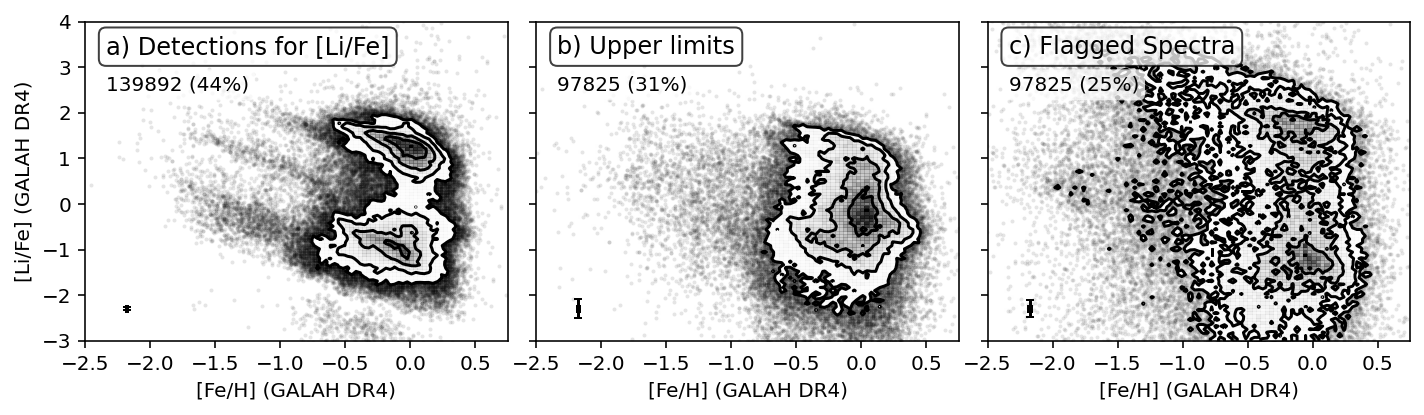

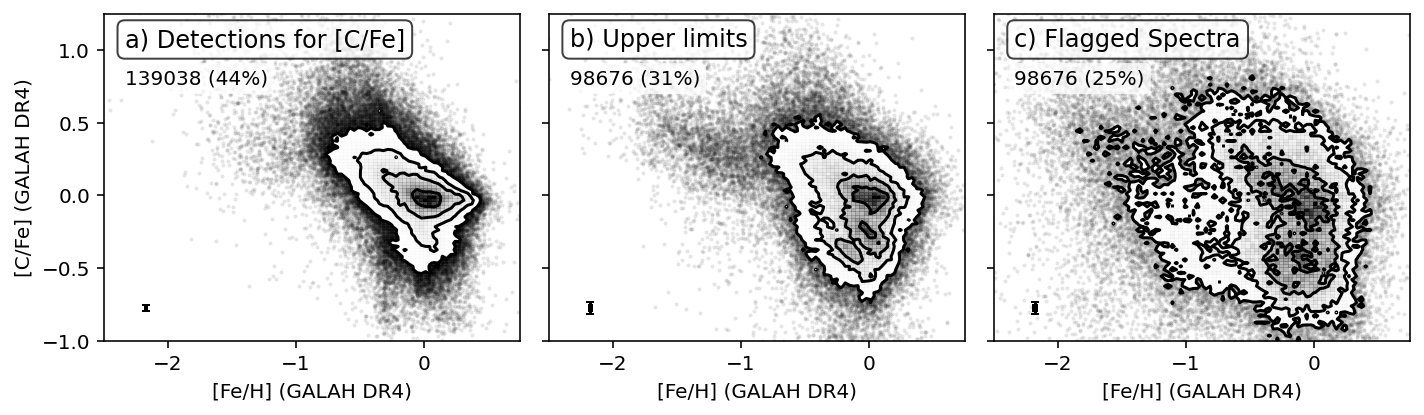

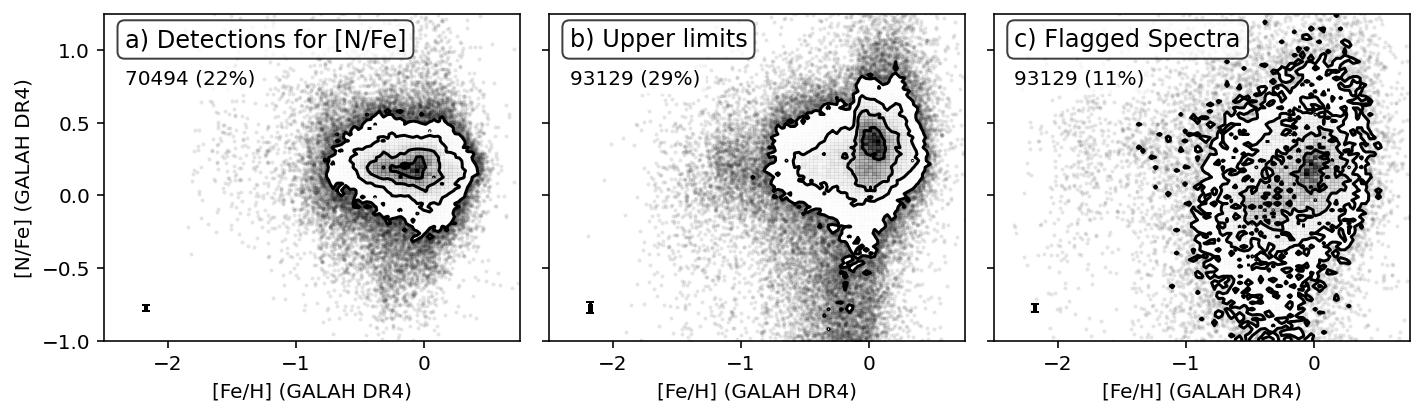

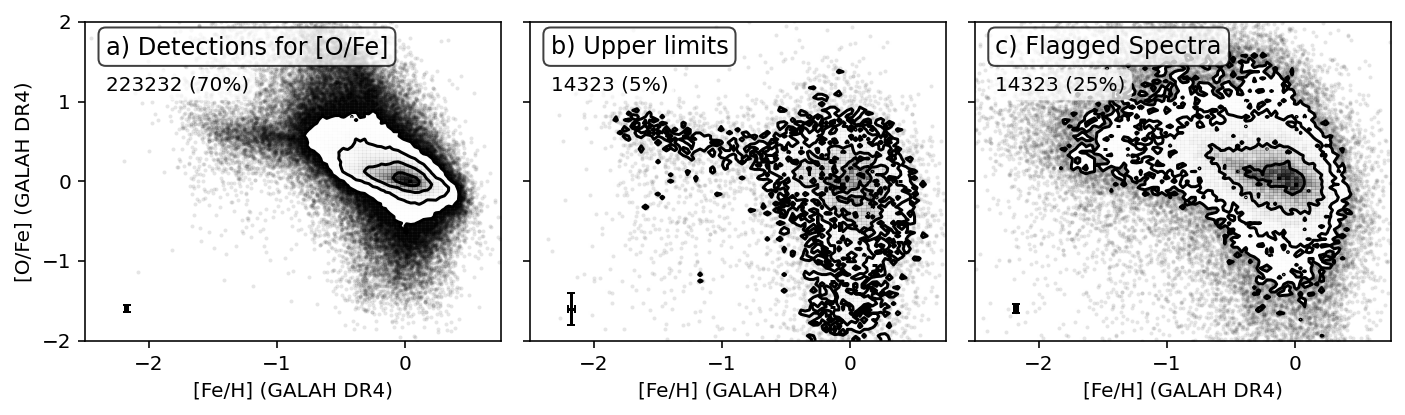

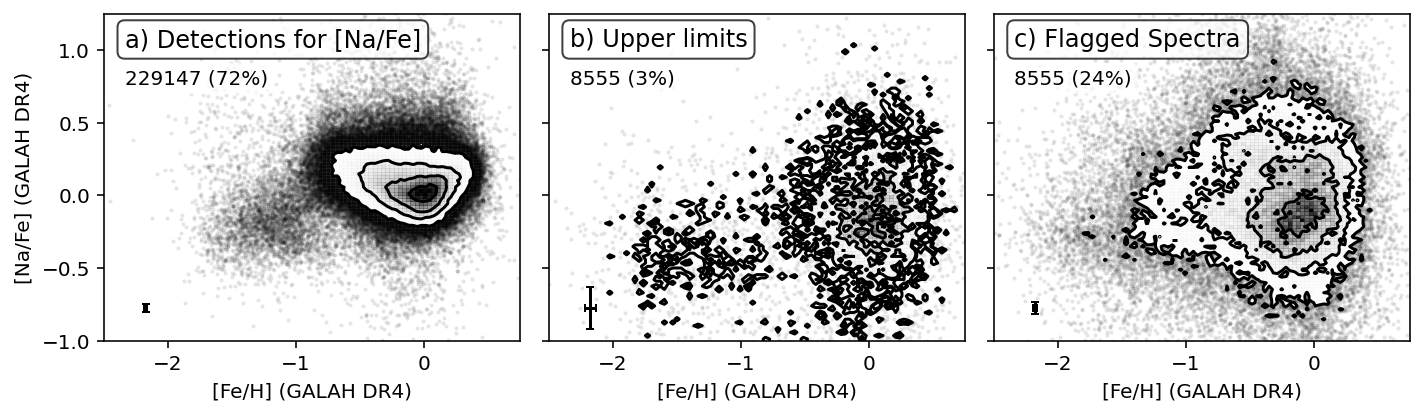

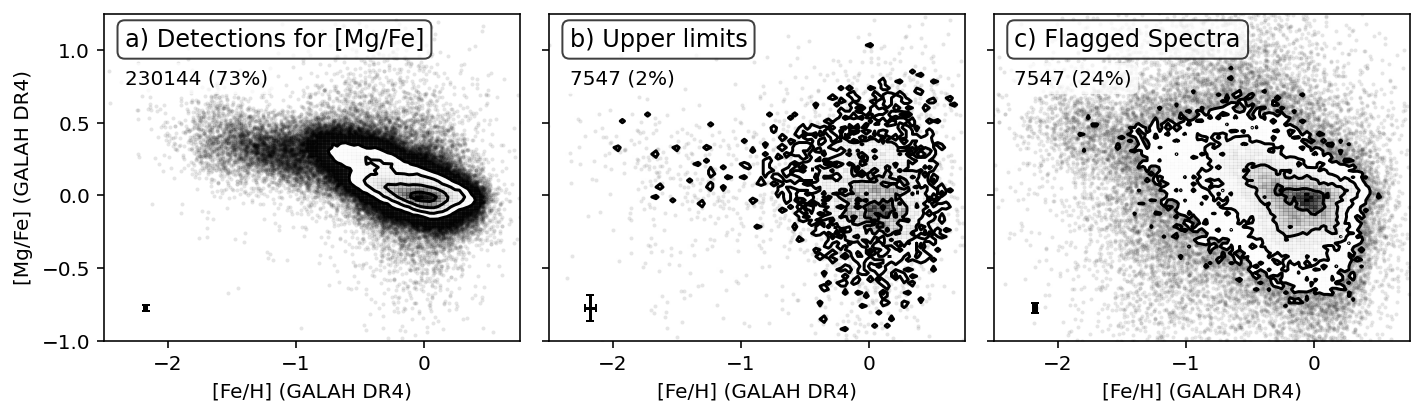

In [120]:
# Plot HRD & abundances 

flag_sp_0 = data['flag_sp'] == 0
flag_sp_above0_but_results = (data['flag_sp'] > 0) & (data['flag_sp'] < np.max(data['flag_sp']))
flag_sp_results = data['flag_sp'] < np.max(data['flag_sp'])

# if len(data) < 2000:
#     plt.figure()
#     plt.scatter(
#         data['teff'][flag_sp_0],
#         data['logg'][flag_sp_0],
#         s=1
#     )
#     plt.scatter(
#         data['teff'][flag_sp_1],
#         data['logg'][flag_sp_1],
#         marker='v',
#         s=0.5
#     )
#     ax.set_xlabel('Teff / K (GALAH DR4)')
#     ax.set_ylabel('log (g / cm s-2) (GALAH DR4)')
#     plt.gca().invert_xaxis()
#     plt.gca().invert_yaxis()
#     plt.show()
#     plt.close()
# else:
#     plt.figure()
#     plt.hist2d(
#         data['teff'][flag_sp_0],
#         data['logg'][flag_sp_0],
#         bins=100,cmin=1,
#         norm=LogNorm()
#     )
# #     plt.scatter(
# #         data['teff'][flag1],
# #         data['logg'][flag1],
# #         marker='v',
# #         s=0.5
# #     )
#     plt.xlabel('Teff / K')
#     plt.ylabel('log (g / cm s-2)')
#     plt.gca().invert_xaxis()
#     plt.gca().invert_yaxis()
#     plt.show()
#     plt.close()

for label in [
    'Li',
    'C',
    'N',
    'O',
    'Na',
    'Mg',
#     'Al',
#     'Si',
#     'K',
#     'Ca',
#     'Sc',
#     'Ti',
#     'V',
#     'Cr',
#     'Mn',
#     'Co',
#     'Ni',
#     'Cu',
#     'Zn',
#     'Rb',
#     'Sr',
#     'Y',
#     'Zr',
#     'Mo',
#     'Ru',
#     'Ba',
#     'La',
#     'Ce',
#     'Nd',
#     'Sm',
#     'Eu'
    ]:
    
    flag0 = flag_sp_0 & (data['flag_'+label.lower()+'_fe'] == 0) #& (data['fe_h'] > -1)
    flag1 = flag_sp_0 & (data['flag_'+label.lower()+'_fe'] == 1) #& (data['fe_h'] > -1)
    flag_rest = flag_sp_above0_but_results & (data['flag_'+label.lower()+'_fe'] <= 1)

    f, gs = plt.subplots(1,3,figsize=(10,3),sharey=True)

    xbins = np.linspace(-2.5,0.75,100)
    if label == 'Li':
        ybins = np.linspace(-3,4,100)
    elif label in ['O','Ba','Y']:
        ybins = np.linspace(-2,2,100)
    else:
        ybins = np.linspace(-1,1.25,100)
    
    # First panel: Detections for GALAH DR4 [Fe/H] vs. [X/Fe]
    ax = gs[0]
    ax.text(0.05,0.9,'a) Detections for ['+label+'/Fe]',ha='left',transform=ax.transAxes,fontsize=12,bbox=dict(boxstyle='round', facecolor='w', alpha=0.75))
    ax.text(0.05,0.785,str(len(data['fe_h'][flag0]))+' ('+"{:.0f}".format(100*len(data['fe_h'][flag0])/len(data['fe_h'][flag_sp_results]))+r'%)',ha='left',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.75,lw=0))
    ax.set_xlabel('[Fe/H] (GALAH DR4)')
    ax.set_ylabel('['+label+'/Fe] (GALAH DR4)')
    corner.hist2d(
        data['fe_h'][flag0],
        data[label.lower()+'_fe'][flag0],
        bins = (xbins,ybins),
        range=[(xbins[0],xbins[-1]),(ybins[0],ybins[-1])],
        ax = ax
    )
    ax.set_xlim(xbins[0],xbins[-1])
    ax.set_ylim(ybins[0],ybins[-1])
    ax.errorbar(
        0.9*xbins[0]+0.1*xbins[-1],
        0.9*ybins[0]+0.1*ybins[-1],
        xerr=np.ma.median(data['e_fe_h'][flag0]),
        yerr=np.ma.median(data['e_'+label.lower()+'_fe'][flag0]),
        capsize=2,color='k'
    )
    
    # Second panel: Upper Limits for GALAH DR4 [Fe/H] vs. [X/Fe]
    ax = gs[1]
    ax.text(0.05,0.9,'b) Upper limits',ha='left',transform=ax.transAxes,fontsize=12,bbox=dict(boxstyle='round', facecolor='w', alpha=0.75))
    ax.text(0.05,0.785,str(len(data['fe_h'][flag1]))+' ('+"{:.0f}".format(100*len(data['fe_h'][flag1])/len(data['fe_h'][flag_sp_results]))+r'%)',ha='left',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.75,lw=0))
    
    ax.set_xlabel('[Fe/H] (GALAH DR4)')
    corner.hist2d(
        data['fe_h'][flag1],
        data[label.lower()+'_fe'][flag1],
        bins = (xbins,ybins),
        range=[(xbins[0],xbins[-1]),(ybins[0],ybins[-1])],
        ax = ax
    )
    ax.set_xlim(xbins[0],xbins[-1])
    ax.set_ylim(ybins[0],ybins[-1])
    ax.errorbar(
        0.9*xbins[0]+0.1*xbins[-1],
        0.9*ybins[0]+0.1*ybins[-1],
        xerr=np.ma.median(data['e_fe_h'][flag1]),
        yerr=np.ma.median(data['e_'+label.lower()+'_fe'][flag1]),
        capsize=2,color='k'
    )

    # Second panel: Upper Limits for GALAH DR4 [Fe/H] vs. [X/Fe]
    ax = gs[2]
    ax.text(0.05,0.9,'c) Flagged Spectra',ha='left',transform=ax.transAxes,fontsize=12,bbox=dict(boxstyle='round', facecolor='w', alpha=0.75))
    ax.text(0.05,0.785,str(len(data['fe_h'][flag1]))+' ('+"{:.0f}".format(100*len(data['fe_h'][flag_rest])/len(data['fe_h'][flag_sp_results]))+r'%)',ha='left',transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='w', alpha=0.75,lw=0))
    
    ax.set_xlabel('[Fe/H] (GALAH DR4)')
    corner.hist2d(
        data['fe_h'][flag_rest],
        data[label.lower()+'_fe'][flag_rest],
        bins = (xbins,ybins),
        range=[(xbins[0],xbins[-1]),(ybins[0],ybins[-1])],
        ax = ax
    )
    ax.set_xlim(xbins[0],xbins[-1])
    ax.set_ylim(ybins[0],ybins[-1])
    ax.errorbar(
        0.9*xbins[0]+0.1*xbins[-1],
        0.9*ybins[0]+0.1*ybins[-1],
        xerr=np.ma.median(data['e_fe_h'][flag_rest]),
        yerr=np.ma.median(data['e_'+label.lower()+'_fe'][flag_rest]),
        capsize=2,color='k'
    )
    
    plt.tight_layout()
    plt.show()
#     plt.savefig('figures/galah_dr4_validation_overview_'+label.lower()+'_fe_density.png',dpi=200,bbox_inches='tight')
    plt.close()

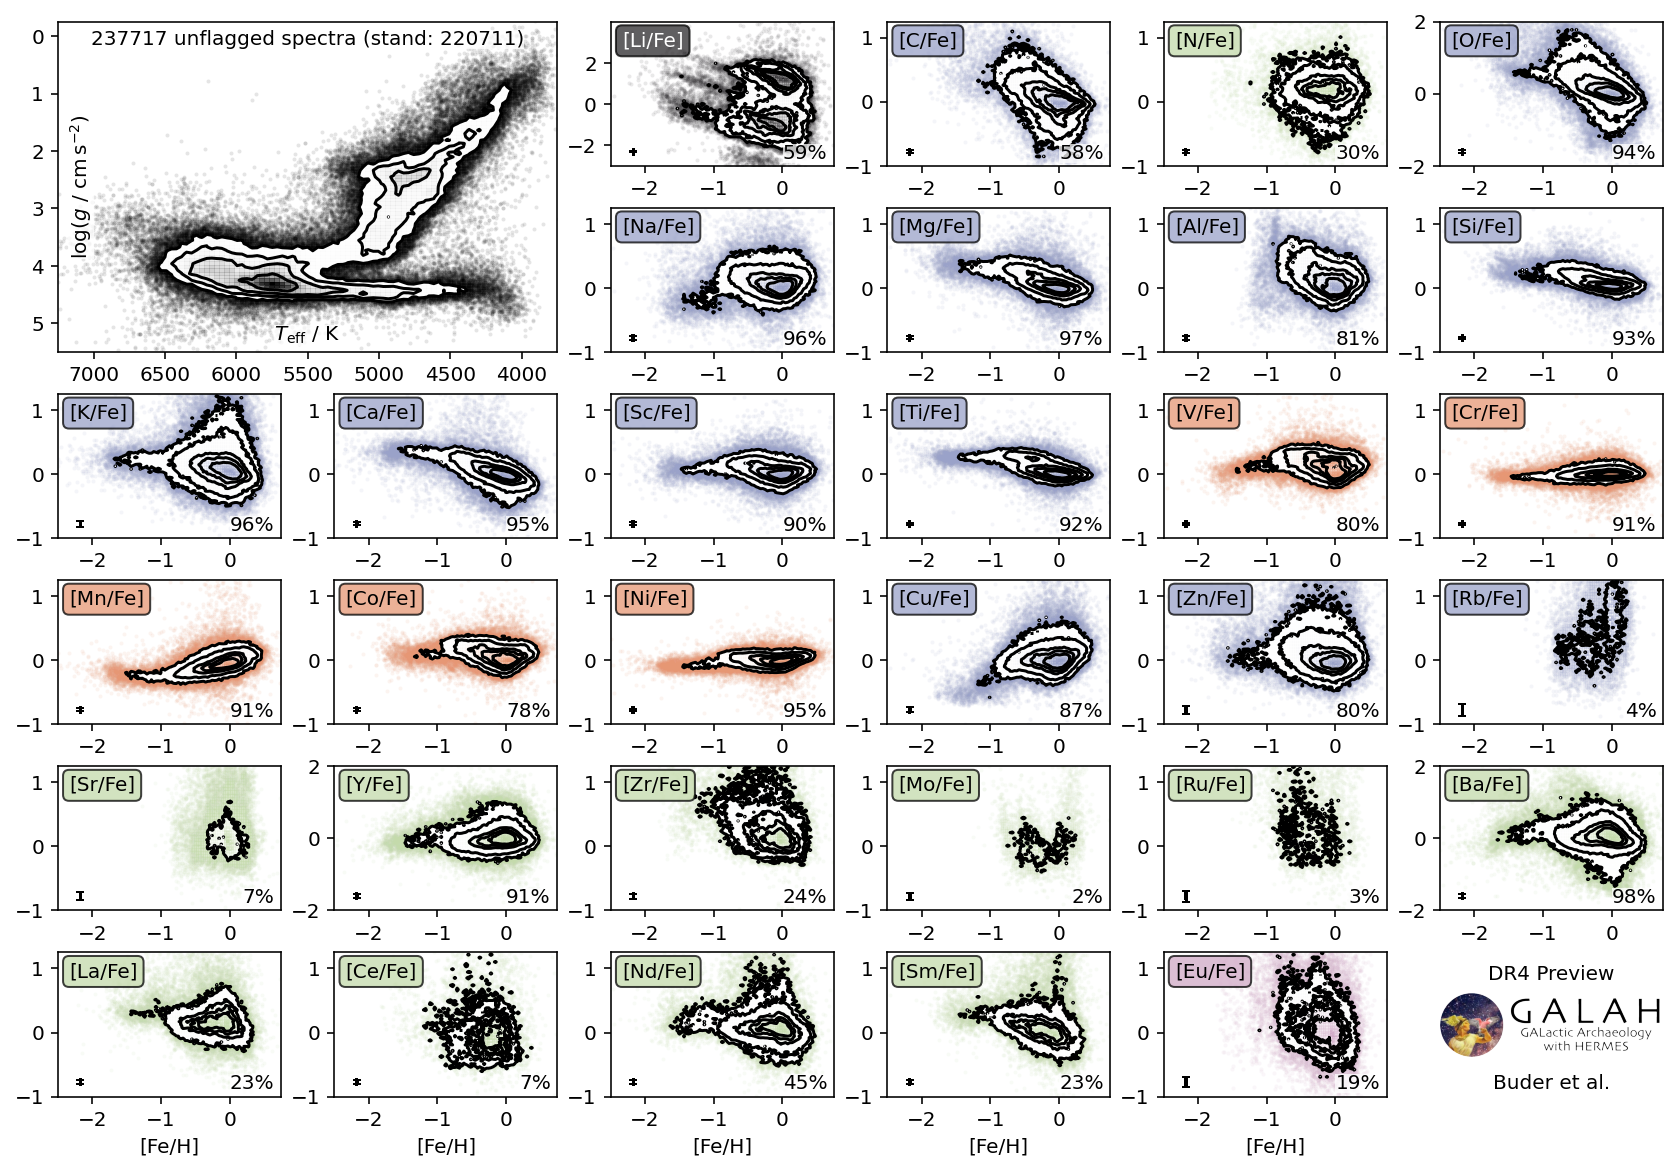

In [266]:
def plot_galah_dr4_overview_A4():
    elements = [
        'Li',
        'C',
        'N',
        'O',
        'Na',
        'Mg',
        'Al',
        'Si',
        'K',
        'Ca',
        'Sc',
        'Ti',
        'V',
        'Cr',
        'Mn',
        'Co',
        'Ni',
        'Cu',
        'Zn',
        'Rb',
        'Sr',
        'Y',
        'Zr',
        'Mo',
        'Ru',
        'Ba',
        'La',
        'Ce',
        'Nd',
        'Sm',
        'Eu'
        ]

    fig, axs = plt.subplots(ncols=6, nrows=6, figsize=(11.75,8.25))
    gs = axs[0, 0].get_gridspec()
    for ax in axs[0, :2]:
        ax.remove()
    for ax in axs[1, :2]:
        ax.remove()

    # HRD 

    flag_sp_0 = data['flag_sp'] == 0
    flag_sp_above0_but_results = (data['flag_sp'] > 0) & (data['flag_sp'] < np.max(data['flag_sp']))
    flag_sp_results = data['flag_sp'] < np.max(data['flag_sp'])

    teff_limits = [3750,7250]
    logg_limits = [-0.25,5.5]

    axbig = fig.add_subplot(gs[:2, :2])
    corner.hist2d(
        data['teff'][flag_sp_0],
        data['logg'][flag_sp_0],
        bins=(np.linspace(teff_limits[0],teff_limits[1],100),np.linspace(logg_limits[0],logg_limits[1],100)),
        ax = axbig
    )
    axbig.set_xlim(teff_limits[1],teff_limits[0])
    axbig.set_ylim(logg_limits[1],logg_limits[0])
    axbig.text(0.5,0.93,str(len(data['teff'][flag_sp_0]))+r' unflagged spectra (stand: 220711)',transform=axbig.transAxes,ha='center',bbox=dict(boxstyle='square,pad=0',lw=0, facecolor='w', alpha=0.75))
    axbig.text(0.5,0.035,r'$T_\mathrm{eff}~/~\mathrm{K}$',transform=axbig.transAxes,ha='center',bbox=dict(boxstyle='square,pad=0',lw=0, facecolor='w', alpha=0.75))
    axbig.text(0.02,0.5,r'$\log (g~/~\mathrm{cm\,s^{-2}})$',transform=axbig.transAxes,va='center',rotation=90,bbox=dict(boxstyle='square,pad=0',lw=0, facecolor='w', alpha=0.75))

    # read an image
    img = iio.imread("figures/logo_desktop.png")

    ax = axs[-1,-1]
    ax.imshow(img)
    ax.axis('off')
    ax.text(0.5,+1.2,'DR4 Preview',transform=ax.transAxes,ha='center')
    ax.text(0.5,-0.5,'Buder et al.',transform=ax.transAxes,ha='center')

    for ind, label in enumerate(elements):    
        if ind <= 3:
            ax = axs[0,2+ind]
        elif ind <= 7:
            ax = axs[1,2+ind-4]
        elif ind <= 13:
            ax = axs[2,ind-8]
        elif ind <= 19:
            ax = axs[3,ind-14]
        elif ind <= 25:
            ax = axs[4,ind-20]
        elif ind <= 32:
            ax = axs[5,ind-26]
        else:
            raise ValueError('blob')
        if label == 'Li':
            color = '#2B292C'
        elif label in ['C','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','Cu','Zn','Rb']:
            color = '#9AA2C9'
        elif label in ['V','Cr','Mn','Fe','Co','Ni']:
            color = '#E69774'
        elif label in ['N','Sr','Y','Zr','Mo','Ru','Ba','La','Ce','Nd','Sm']:
            color = '#C4DAAB'
        elif label in ['Eu']:
            color = '#D0A8C5'

        xbins = np.linspace(-2.5,0.75,100)
        if label == 'Li':
            ybins = np.linspace(-3,4,100)
        elif label in ['O','Ba','Y']:
            ybins = np.linspace(-2,2,100)
        else:
            ybins = np.linspace(-1,1.25,100)

        # First panel: Detections for GALAH DR4 [Fe/H] vs. [X/Fe]
        if label == 'Li':
            textcolor = 'w'
            ax.set_yticks([-2,0,2])
        else:
            textcolor = 'k'

        flag0 = flag_sp_0 & (data['flag_'+label.lower()+'_fe'] == 0) #& (data['fe_h'] > -1)

        ax.text(0.05,0.83,'['+label+'/Fe]',ha='left',color=textcolor, transform=ax.transAxes,fontsize=10,bbox=dict(boxstyle='round', facecolor=color, alpha=0.75))
        ax.text(0.97,0.05,"{:.0f}".format(100*len(data['e_fe_h'][flag0])/len(data['teff'][flag_sp_0]))+'%',ha='right', transform=ax.transAxes,fontsize=10,bbox=dict(boxstyle='square,pad=0',lw=0,facecolor='w', alpha=0.75))

        levels = (0.97,0.9,0.68,0.5,0.3)
        if label in ['La','Ce','Sm','Eu']:
            levels = (0.9,0.68,0.5,0.3)
        elif label in ['Rb','Sr','Mo','Ru']:
            levels = (0.5,)
        corner.hist2d(
            data['fe_h'][flag0],
            data[label.lower()+'_fe'][flag0],
            bins = (xbins,ybins),
            levels = levels,
            contour_kwargs=dict(colors=['k']),
            color=color,
            range=[(xbins[0],xbins[-1]),(ybins[0],ybins[-1])],
            ax = ax
        )
        ax.set_xlim(xbins[0],xbins[-1])
        ax.set_ylim(ybins[0],ybins[-1])
        ax.errorbar(
            0.9*xbins[0]+0.1*xbins[-1],
            0.9*ybins[0]+0.1*ybins[-1],
            xerr=np.ma.median(data['e_fe_h'][flag0]),
            yerr=np.ma.median(data['e_'+label.lower()+'_fe'][flag0]),
            capsize=2,color='k'
        )
        if ind >= 26:
            ax.set_xlabel('[Fe/H]')
    #     else:
        ax.set_xticks([-2,-1,0])
    plt.tight_layout(h_pad=0,w_pad=0)
    plt.savefig('figures/galah_dr4_overview.png',dpi=150,bbox_inches='tight')
    plt.show()
    plt.close()
plot_galah_dr4_overview_A4()

In [ ]:
# Plot CNO

f, gs = plt.subplots(1,3,sharex=True,sharey=True,figsize=(2.5*3,2.5))

x_low  = -2.50
x_high =  0.75
y_low  = -1.00
y_high =  1.75

panels = ['a)','b)','c)','d)']

for i,label in enumerate(['C','N','O']):
#for i,label in enumerate(['C','N','CN','O']):
    ax = gs[i]

    if label in ['C','N','O']:
        flag0 = (data['flag_'+label.lower()+'_fe'] == 0) #& (data['fe_h'] > -1)
        flag1 = (data['flag_'+label.lower()+'_fe'] == 1) #& (data['fe_h'] > -1)
        corner.hist2d(
            data['fe_h'][flag0],
            data[label.lower()+'_fe'][flag0],
            ax = ax,bins=(np.linspace(x_low,x_high,50),np.linspace(y_low,y_high,50))
        )
#         ax.hist2d(
#             data['fe_h'][flag0],
#             data[label.lower()+'_fe'][flag0],
#             cmin = 1, bins=50
#             #s=1,label='Detection'
#         )
#         ax.scatter(
#             data['fe_h'][flag1],
#             data[label.lower()+'_fe'][flag1],
#             marker='v',label='Upper limit',
#             s=0.5
#         )
        
    if label == 'CN':
        flag0 = (data['flag_c_fe'] == 0) & (data['flag_n_fe'] == 0) #& (data['fe_h'] > -1)
        flag1 = ((data['flag_c_fe'] == 1) | (data['flag_n_fe'] == 1)) #& (data['fe_h'] > -1)
        corner.hist2d(
            data['fe_h'][flag0],
            data['c_fe'][flag0]-data['n_fe'][flag0],
            ax = ax,bins=(np.linspace(x_low,x_high,50),np.linspace(y_low,y_high,50))
        )
        #         ax.hist2d(
#             data['fe_h'][flag0],
#             data['c_fe'][flag0]-data['n_fe'][flag0],
#             cmin = 1, bins=50
# #             s=1,label='Detection'
#         )
#         ax.scatter(
#             data['fe_h'][flag1],
#             data['c_fe'][flag1]-data['n_fe'][flag1],
#             marker='v',label='Upper limit',
#             s=0.5
#         )
    
    ax.set_xlim(x_low,x_high)
    ax.set_ylim(y_low,y_high)
    
#     if i==0:
#         ax.legend()
    ax.set_xlabel('[Fe/H]')
    if label in ['C','N','O']:
        ax.set_ylabel('['+label+'/Fe]')
    if label == 'CN':
        ax.set_ylabel('[C/N]')
plt.tight_layout()
#plt.savefig('figures/overview_CNO_incl_upper_limits.png',dpi=200,bbox_inches='tight')
plt.savefig('figures/overview_CNO.png',dpi=200,bbox_inches='tight')
plt.show()
plt.close()

In [43]:
# [X/Fe] = [X/H] - [M/H]
# [X/H] + (A_X - 12) = log(N_X/N_H) 
# [X/Fe] = log(N_X / N_H) - log(N_X / N_H)_Sun - [Fe/H]
# [C + N / Fe] = log((N_C + N_N) / N_H) - log((N_C_Sun + (N_N_Sun / N_H)_Sun - [Fe/H]
# [C + N / Fe] = log(N_C/N_H + N_N/N_H) - log(N_C_Sun/H_Sun + N_N_Sun/N_H_Sun) - [Fe/H]

A_N_Sun = 7.78+0.15
A_C_Sun = 8.39+0.037

A_C = data['c_fe'] + data['fe_h'] + (A_C_Sun)
A_N = data['n_fe'] + data['fe_h'] + (A_N_Sun)

N_C_N_H = 10**(A_C + 12)
N_N_N_H = 10**(A_N + 12)
N_C_N_H_sun = 10**(A_C_Sun + 12)
N_N_N_H_sun = 10**(A_N_Sun + 12)

data['cn_fe'] = np.log10(N_C_N_H + N_N_N_H) - np.log10(N_C_N_H_sun + N_N_N_H_sun) - data['fe_h']

In [ ]:
def cn_masses(fe_h, c_fe, n_fe, cn_fe):
    return(
        1.08 - 0.18 * fe_h + 4.30 * c_fe +1.43 * n_fe - 7.55 * cn_fe
        - 1.05 * (fe_h)**2 - 1.12 * (fe_h * c_fe) - 0.67 * (fe_h * n_fe) - 1.30 * (fe_h * cn_fe)
        - 49.92 * (c_fe)**2 - 41.04 * (c_fe * n_fe) + 139.92 * (c_fe * cn_fe)
        - 0.63 * (n_fe)**2 + 47.33 * (n_fe * cn_fe)
        - 86.62 * (cn_fe)**2
    )
data['mass'] = cn_masses(fe_h=data['fe_h'], c_fe=data['c_fe'], n_fe=data['n_fe'], cn_fe=(data['cn_fe']-0.1)/2.)

In [ ]:
def cn_ages(fe_h, c_fe, n_fe, cn_fe, teff, logg):
    return(
        -54.35 + 6.53*fe_h -19.02 *c_fe -12.18*n_fe +37.22*cn_fe +59.58*teff +16.14*logg
        +0.74*fe_h*fe_h +4.04*fe_h*c_fe +0.76*fe_h*n_fe -4.94*fe_h*cn_fe -1.46*fe_h*teff -1.56*fe_h*logg
        +26.90*c_fe*c_fe +13.33*c_fe*n_fe -77.84*c_fe*cn_fe +48.29*c_fe*teff -13.12*c_fe*logg
        -1.04*n_fe*n_fe -17.60*n_fe*cn_fe +13.99*n_fe*teff -1.77*n_fe*logg
        +51.24*cn_fe*cn_fe -65.67*cn_fe*teff +14.24*cn_fe*logg
        +15.54*teff*teff -34.68*teff*logg
        +4.17*logg*logg
    )
data['age'] = 10**(cn_ages(fe_h=data['fe_h'], c_fe=data['c_fe'], n_fe=data['n_fe'], cn_fe=data['cn_fe'], teff=data['teff']/4000., logg=data['logg']))

In [ ]:
def hist2d_bin_colored(X,Y,Z,X_label='X\_label',Y_label='Y\_label',Z_label='Z\_label',bins=30,bin_function='median',ax=None,cmap='seismic_r',minimum_bin_entries = 5,**kwargs):
    """
    INPUT:
    X : x-axis parameter
    Y : y-axis parameter
    Z : parameter that will be used for coloring the bins
    X/Y/Z_label : label names
    bins = 30, but you can also give it bins = (np.linspace(x_min,x_max,30),np.linspace(y_min,y_max,30))
    bin_function : median/average/sum
    ax : if you plot it as part of an f,ax = plt.subplots()
    minimum_bin_entries : how many entries do we expect, before we even consider throwing some fancy function at them
    
    OUTPUT:
    plt.imshow
    """
    
    # First make sure we only work with finite values
    finite = np.isfinite(X) & np.isfinite(Y) & np.isfinite(Z)
    if len(X[finite])!=len(X):
        print('Not all values were finite! Continuing with only finite ones')
    X=X[finite];Y=Y[finite];Z=Z[finite]
    
    # Now create the matrix of bins and its bin-edges
    H,xedges,yedges = np.histogram2d(X,Y,bins=bins)

    # Create the matrix that we want to store color-values in
    color_matrix = np.zeros_like(H)
    color_matrix[:] = np.nan
    
    # Loop through the x- and y-bins
    for x_bin in range(len(xedges)-1):
        for y_bin in range(len(yedges)-1):
            in_xy_bin = (X>=xedges[x_bin])&(X<xedges[x_bin+1])&(Y>=yedges[y_bin])&(Y<yedges[y_bin+1])
            
            # We only add a value if there are more than *minimum_bin_entries* in the bin
            if len(Z[in_xy_bin]) >= minimum_bin_entries:
                if bin_function=='median':
                    color_matrix[x_bin,y_bin]=np.median(Z[in_xy_bin])
                elif bin_function=='average':
                    color_matrix[x_bin,y_bin]=np.average(Z[in_xy_bin])
                elif bin_function=='sum':
                    color_matrix[x_bin,y_bin]=np.sum(Z[in_xy_bin])
                elif bin_function=='std':
                    color_matrix[x_bin,y_bin]=np.std(Z[in_xy_bin])
                else:
                    raise NameError('Only bin_function = median/average/sum available')

    # Create an axis if not given
    if ax==None:
        ax = plt.gca()
    else:
        ax=ax
    ax.set_xlabel(X_label)
    ax.set_ylabel(Y_label)

    # Populate the keyword arguments for the imshow
    imshow_kwargs = dict(
        cmap = cmap,aspect='auto',origin='lower'
    )
    # Update by any arguments given through **kwargs
    imshow_kwargs.update(kwargs)

    # Plot!
    s = ax.imshow(color_matrix.T,extent=(xedges[0],xedges[-1],yedges[0],yedges[-1]),**imshow_kwargs)
    c = plt.colorbar(s, ax=ax)
    c.set_label(Z_label)

In [ ]:
giants = (data['logg'] < 3.5) & (data['flag_c_fe'] == 0) & (data['flag_n_fe'] == 0)

f, gs = plt.subplots(2,2,figsize=(7,5))
hist2d_bin_colored(
    data['fe_h'][giants],
    data['mg_fe'][giants],
    data['mass'][giants],
    X_label='[Fe/H]',
    Y_label='[Mg/Fe]',
    Z_label=r'Mass / $\mathrm{M}_\odot$',
    ax = gs[0,0],
    bins = (np.linspace(-0.8,0.3,30),np.linspace(-0.1,0.4,30)),
    vmin = 0.8, vmax = 2.0,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
hist2d_bin_colored(
    data['fe_h'][giants],
    data['c_fe'][giants]-data['n_fe'][giants],
    data['mass'][giants],
    X_label='[Fe/H]',
    Y_label='[C/N]',
    Z_label=r'Mass / $\mathrm{M}_\odot$',
    ax = gs[0,1],
    bins = (np.linspace(-0.8,0.3,30),np.linspace(-0.8,0.4,30)),
    vmin = 0.8, vmax = 2.0,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
hist2d_bin_colored(
    data['teff'][giants],
    data['logg'][giants],
    data['mass'][giants],
    X_label='Teff / K',
    Y_label='logg',
    Z_label=r'Mass / $\mathrm{M}_\odot$',
    ax = gs[1,0],
    bins = (np.linspace(3000,5500,30),np.linspace(0,4,30)),
    vmin = 0.8, vmax = 2.0,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
gs[1,0].set_xlim(5500,3750)
gs[1,0].set_ylim(4,0)
hist2d_bin_colored(
    data['c_fe'][giants]-data['n_fe'][giants],
    data['mass'][giants],
    data['fe_h'][giants],
    X_label='[C/N]',
    Y_label=r'Mass / $\mathrm{M}_\odot$',
    Z_label='[Fe/H]',
    ax = gs[1,1],
    bins = (np.linspace(-0.8,0.4,30),np.linspace(0.5,3.0,30)),
    vmin = -0.8, vmax = 0.3,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
plt.tight_layout()

In [ ]:
giants = (data['logg'] > 1.8) & (data['logg'] < 3.3) & (data['flag_c_fe'] == 0) & (data['flag_n_fe'] == 0)

f, gs = plt.subplots(2,2,figsize=(7,5))
hist2d_bin_colored(
    data['fe_h'][giants],
    data['mg_fe'][giants],
    data['age'][giants],
    X_label='[Fe/H]',
    Y_label='[Mg/Fe]',
    Z_label=r'Age / Gyr',
    ax = gs[0,0],
    bins = (np.linspace(-0.8,0.3,30),np.linspace(-0.1,0.4,30)),
    vmin = 0, vmax = 14,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
hist2d_bin_colored(
    data['fe_h'][giants],
    data['c_fe'][giants]-data['n_fe'][giants],
    data['age'][giants],
    X_label='[Fe/H]',
    Y_label='[C/N]',
    Z_label=r'Age / Gyr',
    ax = gs[0,1],
    bins = (np.linspace(-0.8,0.3,30),np.linspace(-0.8,0.4,30)),
    vmin = 0, vmax = 14,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
hist2d_bin_colored(
    data['teff'][giants],
    data['logg'][giants],
    data['age'][giants],
    X_label='Teff / K',
    Y_label='logg',
    Z_label=r'Age / Gyr',
    ax = gs[1,0],
    bins = (np.linspace(3000,5500,30),np.linspace(0,4,30)),
    vmin = 0, vmax = 14,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
gs[1,0].set_xlim(5500,3750)
gs[1,0].set_ylim(4,0)
hist2d_bin_colored(
    data['c_fe'][giants]-data['n_fe'][giants],
    data['age'][giants],
    data['fe_h'][giants],
    X_label='[C/N]',
    Y_label=r'Age / Gyr',
    Z_label='[Fe/H]',
    ax = gs[1,1],
    bins = (np.linspace(-0.8,0.4,30),np.linspace(0,14,30)),
    vmin = -0.8, vmax = 0.3,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
plt.tight_layout()